## Observations and Insights 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
allColumns = combinedData.columns
# Display the data table for preview
combinedData.head()

In [60]:
# Checking the number of mice.
origMouseCount = len(combinedData["Mouse ID"].unique())
print(f"There are {origMouseCount} mice in this study before checking the data")

There are 249 mice in this study before checking the data


In [43]:
#combinedData["Timepoint"].unique()
combinedData["Unique ID"] = combinedData["Mouse ID"].astype(str) + "_" + combinedData["Timepoint"].astype(str)
combinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unique ID
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20


In [ ]:
dupFinder = pd.DataFrame(combinedData.duplicated(subset=['Mouse ID', 'Timepoint']))
dupFinder.loc[dupFinder[0] == True]

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
UIDCount = combinedData["Unique ID"].value_counts().astype(str)
UIDCount.head(10)

g989_15    2
g989_0     2
g989_20    2
g989_10    2
g989_5     2
q511_10    1
l490_30    1
x613_15    1
x402_15    1
o331_20    1
Name: Unique ID, dtype: object

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
dupMouse = combinedData.loc[combinedData["Mouse ID"] == "g989", :]
dupMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Unique ID
908,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989_5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989_5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989_10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989_10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989_15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989_15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989_20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combinedData.loc[combinedData["Mouse ID"] != "g989", allColumns]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice in the clean DataFrame.
cleanedMouseCount = len(cleaned_df["Mouse ID"].unique())
print(f"There are {cleanedMouseCount} mice in this study")

There are 248 mice in this study


## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
RegimenGroup = cleaned_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])
tumorVolumeStats = RegimenGroup.loc[:,"Tumor Volume (mm3)"]
tumorVolumeStats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Ramicane     25
Placebo      25
Zoniferol    25
Naftisol     25
Ceftamin     25
Ketapril     25
Infubinol    25
Capomulin    25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

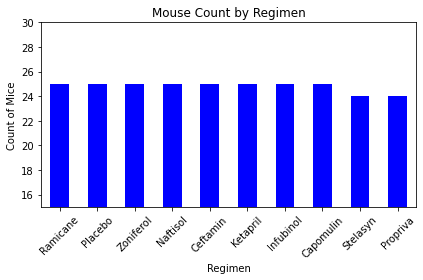

In [87]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
uniqueMice_df = cleaned_df.drop_duplicates(subset="Mouse ID", keep="first")
drugRegimenCount = uniqueMice_df["Drug Regimen"].value_counts()
#pdMouseCountBar = cleaned_df.plot(x=drugRegimenList y="Drug Regimen" )
drugRegimenCount.plot(kind="bar", facecolor="blue", rot=45)
plt.title("Mouse Count by Regimen")
plt.xlabel("Regimen")
plt.ylabel("Count of Mice")
plt.tight_layout()
plt.ylim(0,30)
drugRegimenCount

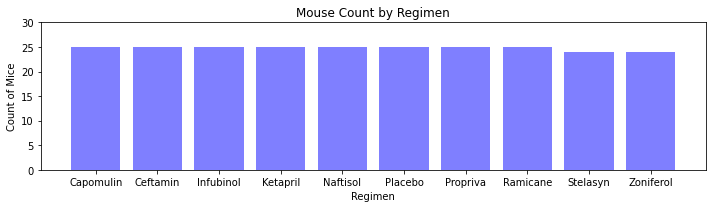

In [97]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugRegimenList = tumorVolumeStats.index
plt.figure(figsize=(10,3))
plt.bar(x=drugRegimenList, height=drugRegimenCount, color='blue', alpha=0.5, align="center")
plt.title("Mouse Count by Regimen")
plt.xlabel("Regimen")
plt.ylabel("Count of Mice")
plt.ylim(0,30)
plt.tight_layout()

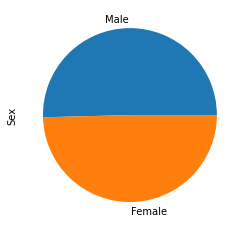

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseGender = uniqueMice_df["Sex"].value_counts()
mouseGender.plot(kind="pie")

Text(0.5, 1.0, 'Count of Mice Tested by Gender')

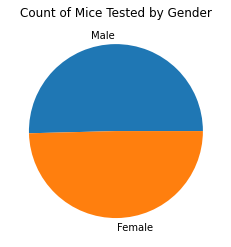

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouseGender, labels= ["Male", "Female"])
plt.title("Count of Mice Tested by Gender")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
